# **1. 준비된 Custom Dataset 가져오기**

**1-1. 데이터 가져오기**
- VM에 dataset.zip 파일로 업로드 후 압축 풀기

In [1]:
import zipfile

with zipfile.ZipFile('/content/dataset2.zip') as target_file:
    target_file.extractall('/content/dataset2')

In [2]:
!pip install labelme2yolo

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 53.3 MB/s eta 0:00:00


In [3]:
!labelme2yolo --json_dir /content/dataset2 --val_size 0.2 --output_format polygon  # --output_format bbox 또는 polygon(default는 bbox)

[2024-08-21T09:07:19Z INFO  labelme2yolo] Starting the conversion process...
[2024-08-21T09:07:19Z INFO  labelme2yolo] Read and parsed 20 JSON files.
⠁ [Train] [00:00:00] [########################################] 16/16 (0s)
  [Train] [00:00:00] [########################################] 16/16 (0s)
⠁ [Val] [00:00:00] [########################################] 4/4 (0s)
  [Val] [00:00:00] [########################################] 4/4 (0s)
[2024-08-21T09:07:19Z INFO  labelme2yolo] Creating dataset.yaml file...
[2024-08-21T09:07:19Z INFO  labelme2yolo] Conversion process completed successfully.


**1-2. yaml파일 확인하기**
- yaml 파일은 모델학습에 사용되는 데이터의 위치, 클래스의 수, 클래스명의 정보를 가지고 있다.

In [4]:
!cat /content/dataset2/YOLODataset/dataset.yaml

path: /content/dataset2/YOLODataset
train: images/train
val: images/val
test:

names:
    0: Tomato
    1: Apple
    2: Oriental melon


# **2. Custom yaml 파일을 만들자.**

In [5]:
# PyYAML을 설치하자
!pip install PyYAML

In [7]:
import yaml

data_cf = {'train' : '/content/dataset2/YOLODataset/images/train',
           'val' : '/content/dataset2/YOLODataset/images/val',
           'names' : ["Tomato", "Apple", "Oriental melon"],
           'nc' : 3 }

# fruit_data.yaml 이란 이름으로 custom yaml 파일을 만든다.
with open('/content/dataset2/YOLODataset/fruit_data.yaml', 'w') as f:
  yaml.dump(data_cf, f)

# fruit_data.yaml 확인
with open('/content/dataset2/YOLODataset/fruit_data.yaml', 'r') as f:
  fruit_yaml = yaml.safe_load(f)
  display(fruit_yaml)

{'names': ['Tomato', 'Apple', 'Oriental melon'],
 'nc': 3,
 'train': '/content/dataset2/YOLODataset/images/train',
 'val': '/content/dataset2/YOLODataset/images/val'}

# **3. YOLOv8을 사용하기 위한 Setup(셋업)**

In [8]:
# ultralytics 설치
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.3/41.3 kB 3.3 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.

In [9]:
# ultralytics 를 불러오고 체크
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.2.79 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 33.6/78.2 GB disk)


# **4. Custom YOLO Training(학습)**

**Segmentation 모델로 사용할 수 있는 모델의 종류**

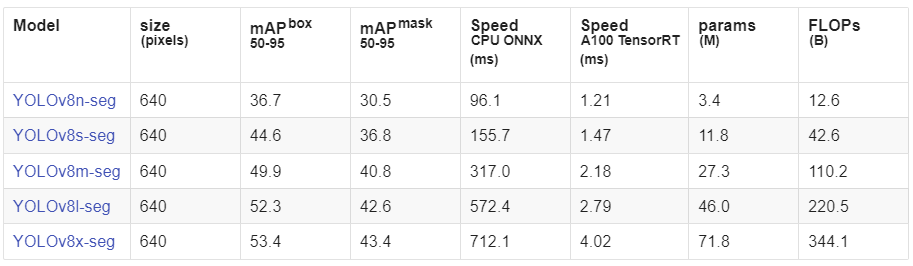

In [10]:
# ultralytics에서 YOLO 모듈을 불러옴
from ultralytics import YOLO
# yolov8n-seg.pt 모델의 아키텍처와 가중치을 함께 불러옴
model = YOLO('yolov8n-seg.pt')

100%|██████████| 6.74M/6.74M [00:00<00:00, 282MB/s]


In [11]:
# 모델이 분류할 수 있는 부류의 수 확인
print(type(model.names), len(model.names))
# 모델이 분류할 수 있는 부류 확인
print(model.names)

<class 'dict'> 80
{0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair', 57: 'couch', 58: 'potted plant', 59: 'bed', 60: 'dining table', 61: 'toilet', 62: 'tv', 63: 'laptop', 64: 'mouse', 65: 'remote', 66: 'keyboard', 67: 'cell p

**불러온 모델 아키텍처를 이용하여 우리가 준비한 Custom Dataset으로 학습을 시켜보자.**

In [12]:
model.train(data='/content/dataset2/YOLODataset/fruit_data.yaml', epochs=100, patience=10, batch=8, imgsz=640)

Ultralytics YOLOv8.2.79 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=segment, mode=train, model=yolov8n-seg.pt, data=/content/dataset2/YOLODataset/fruit_data.yaml, epochs=100, time=None, patience=10, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True

100%|██████████| 755k/755k [00:00<00:00, 50.7MB/s]


Overriding model.yaml nc=80 with nc=3

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

100%|██████████| 6.25M/6.25M [00:00<00:00, 300MB/s]


AMP: checks passed ✅


train: Scanning /content/dataset2/YOLODataset/labels/train... 16 images, 0 backgrounds, 0 corrupt: 100%|██████████| 16/16 [00:00<00:00, 265.60it/s]

train: New cache created: /content/dataset2/YOLODataset/labels/train.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /content/dataset2/YOLODataset/labels/val... 4 images, 0 backgrounds, 0 corrupt: 100%|██████████| 4/4 [00:00<00:00, 186.00it/s]

val: New cache created: /content/dataset2/YOLODataset/labels/val.cache


Plotting labels to runs/segment/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 66 weight(decay=0.0), 77 weight(decay=0.0005), 76 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/segment/train
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      1/100      1.72G     0.4347      1.095      3.286     0.9034         52        640: 100%|██████████| 2/2 [00:03<00:00,  1.53s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.43s/it]

                   all          4         36     0.0128      0.433      0.092     0.0746     0.0137       0.45      0.125     0.0813



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      2/100      1.65G     0.4423      1.203       3.25      0.924         55        640: 100%|██████████| 2/2 [00:00<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.53it/s]

                   all          4         36      0.011      0.322     0.0766     0.0735     0.0136       0.45      0.106     0.0799



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      3/100      1.63G     0.3897      1.022      3.237     0.8645         84        640: 100%|██████████| 2/2 [00:00<00:00,  2.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.91it/s]

                   all          4         36     0.0127      0.433      0.145      0.103     0.0127      0.433      0.148      0.117



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      4/100      1.74G     0.3696     0.6395      2.981     0.8362         75        640: 100%|██████████| 2/2 [00:00<00:00,  4.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.64it/s]

                   all          4         36     0.0159      0.572      0.222       0.22     0.0167      0.628      0.224       0.21



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      5/100      1.69G     0.3546     0.5068      2.789      0.829         66        640: 100%|██████████| 2/2 [00:00<00:00,  3.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.38it/s]

                   all          4         36     0.0225      0.817      0.322      0.313     0.0225      0.817      0.323      0.302



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      6/100       1.7G     0.2994     0.4056      2.526     0.8134         63        640: 100%|██████████| 2/2 [00:00<00:00,  2.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.62it/s]

                   all          4         36     0.0247      0.867      0.396      0.373     0.0255      0.883      0.403      0.378



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      7/100      1.61G     0.3601      0.408      2.429     0.8345         72        640: 100%|██████████| 2/2 [00:00<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.34it/s]

                   all          4         36     0.0263        0.9      0.477      0.446     0.0271      0.933       0.48      0.448



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      8/100      1.55G     0.3664     0.3833      2.268     0.8443         81        640: 100%|██████████| 2/2 [00:00<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.27it/s]


                   all          4         36     0.0296          1      0.574      0.515     0.0296          1      0.574      0.528

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      9/100      1.61G     0.3921     0.3938      1.995      0.837         99        640: 100%|██████████| 2/2 [00:00<00:00,  4.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.69it/s]

                   all          4         36     0.0298          1      0.582       0.53     0.0298          1      0.582      0.544



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     10/100      1.62G     0.4148     0.4024      1.876     0.8345        103        640: 100%|██████████| 2/2 [00:00<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.95it/s]

                   all          4         36          1      0.193      0.602      0.548          1      0.193      0.602      0.552



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     11/100      1.63G     0.3637     0.3776      1.731     0.8223         87        640: 100%|██████████| 2/2 [00:00<00:00,  4.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.34it/s]

                   all          4         36          1      0.105      0.605      0.546          1      0.105      0.605      0.558



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     12/100      1.57G     0.3835     0.3695      1.543     0.8274         87        640: 100%|██████████| 2/2 [00:00<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.12it/s]

                   all          4         36          1      0.105      0.605      0.546          1      0.105      0.605      0.558



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     13/100      1.61G     0.3644     0.3645      1.398     0.8221         75        640: 100%|██████████| 2/2 [00:00<00:00,  4.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.47it/s]

                   all          4         36          1       0.15      0.634      0.558          1       0.15      0.634      0.588



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     14/100      1.64G     0.3964     0.4307       1.47     0.8311         95        640: 100%|██████████| 2/2 [00:00<00:00,  4.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.05it/s]

                   all          4         36          1      0.189      0.644      0.586          1      0.189      0.644      0.602



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     15/100      1.54G     0.3633     0.3345      1.255      0.822         86        640: 100%|██████████| 2/2 [00:00<00:00,  4.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.87it/s]

                   all          4         36          1      0.189      0.644      0.586          1      0.189      0.644      0.602



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     16/100      1.56G     0.3241     0.2872      1.156     0.8288         64        640: 100%|██████████| 2/2 [00:00<00:00,  4.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.57it/s]

                   all          4         36          1      0.283      0.747      0.711          1      0.283      0.747      0.716



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     17/100       1.7G     0.3674     0.3677      1.084     0.8178         80        640: 100%|██████████| 2/2 [00:00<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.34it/s]


                   all          4         36          1       0.44      0.791      0.739          1       0.44      0.791      0.758

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     18/100      1.59G     0.3729     0.3238       1.22     0.8413         92        640: 100%|██████████| 2/2 [00:00<00:00,  2.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.79it/s]

                   all          4         36          1       0.44      0.791      0.739          1       0.44      0.791      0.758



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     19/100      1.83G     0.4345     0.3525      1.195     0.8057         71        640: 100%|██████████| 2/2 [00:00<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.03it/s]

                   all          4         36          1      0.464      0.802      0.762          1      0.464      0.802      0.769



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     20/100      1.72G      0.381     0.3185     0.9952     0.8294         99        640: 100%|██████████| 2/2 [00:00<00:00,  3.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.55it/s]

                   all          4         36          1      0.464      0.802      0.762          1      0.464      0.802      0.769



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     21/100       1.6G     0.3395      0.294     0.9589     0.8338         95        640: 100%|██████████| 2/2 [00:00<00:00,  4.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.40it/s]

                   all          4         36          1      0.472      0.838        0.8          1      0.472      0.838      0.785



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     22/100       1.7G     0.3548     0.2994     0.8858     0.8118        106        640: 100%|██████████| 2/2 [00:00<00:00,  4.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.31it/s]

                   all          4         36          1      0.472      0.838        0.8          1      0.472      0.838      0.785



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     23/100      1.57G     0.3541     0.2922     0.9412     0.8395         55        640: 100%|██████████| 2/2 [00:00<00:00,  4.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.65it/s]

                   all          4         36       0.62       0.51      0.847      0.789       0.62       0.51      0.847      0.784



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     24/100      1.59G     0.3356     0.2864        0.8     0.8349         50        640: 100%|██████████| 2/2 [00:00<00:00,  4.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.25it/s]

                   all          4         36       0.62       0.51      0.847      0.789       0.62       0.51      0.847      0.784



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     25/100      1.65G     0.3606     0.3196      0.769      0.828         74        640: 100%|██████████| 2/2 [00:00<00:00,  4.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.79it/s]

                   all          4         36      0.621      0.541      0.864      0.824      0.621      0.541      0.864      0.788



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     26/100      1.75G     0.3506     0.4664      0.894     0.8238         46        640: 100%|██████████| 2/2 [00:00<00:00,  5.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.27it/s]

                   all          4         36      0.621      0.541      0.864      0.824      0.621      0.541      0.864      0.788



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     27/100      1.72G     0.3314     0.2845     0.6856     0.8194         86        640: 100%|██████████| 2/2 [00:00<00:00,  3.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.40it/s]

                   all          4         36      0.621      0.541      0.864      0.824      0.621      0.541      0.864      0.788



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     28/100      1.56G     0.3286     0.2937     0.7398     0.8298         61        640: 100%|██████████| 2/2 [00:00<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.60it/s]

                   all          4         36      0.764       0.51      0.868      0.841      0.764       0.51      0.868      0.796



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     29/100      1.61G     0.3471     0.2696      0.716     0.8251         79        640: 100%|██████████| 2/2 [00:00<00:00,  2.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.76it/s]

                   all          4         36      0.764       0.51      0.868      0.841      0.764       0.51      0.868      0.796



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     30/100      1.68G     0.3311     0.2867     0.7679     0.8448         53        640: 100%|██████████| 2/2 [00:00<00:00,  2.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.59it/s]

                   all          4         36      0.937      0.689      0.959      0.915      0.937      0.689      0.959      0.901



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     31/100      1.67G      0.356      0.319     0.7979      0.827         57        640: 100%|██████████| 2/2 [00:00<00:00,  5.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.03it/s]

                   all          4         36      0.937      0.689      0.959      0.915      0.937      0.689      0.959      0.901



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     32/100      1.68G     0.3388     0.2665      0.694     0.8156         64        640: 100%|██████████| 2/2 [00:00<00:00,  4.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.83it/s]

                   all          4         36      0.937      0.689      0.959      0.915      0.937      0.689      0.959      0.901



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     33/100      1.62G     0.3254      0.269     0.6857     0.8305         79        640: 100%|██████████| 2/2 [00:00<00:00,  5.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.08it/s]

                   all          4         36      0.989      0.896      0.995      0.935      0.989      0.896      0.995      0.945



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     34/100       1.6G     0.3383       0.37      0.686     0.8432         55        640: 100%|██████████| 2/2 [00:00<00:00,  4.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.29it/s]


                   all          4         36      0.989      0.896      0.995      0.935      0.989      0.896      0.995      0.945

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     35/100      1.67G     0.3402      0.301     0.6546     0.8151         87        640: 100%|██████████| 2/2 [00:00<00:00,  5.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.39it/s]


                   all          4         36      0.989      0.896      0.995      0.935      0.989      0.896      0.995      0.945

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     36/100      1.69G     0.3588     0.3395     0.6732     0.8254         73        640: 100%|██████████| 2/2 [00:00<00:00,  4.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.93it/s]

                   all          4         36      0.934      0.984      0.989      0.954      0.934      0.984      0.989      0.934



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     37/100       1.6G     0.3274     0.3557     0.6367     0.8301         73        640: 100%|██████████| 2/2 [00:00<00:00,  4.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.17it/s]

                   all          4         36      0.934      0.984      0.989      0.954      0.934      0.984      0.989      0.934



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     38/100      1.58G     0.3089     0.2727     0.6888     0.8243        105        640: 100%|██████████| 2/2 [00:00<00:00,  3.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.62it/s]

                   all          4         36      0.934      0.984      0.989      0.954      0.934      0.984      0.989      0.934



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     39/100      1.61G     0.3223     0.2611     0.6341     0.8216         93        640: 100%|██████████| 2/2 [00:00<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.82it/s]


                   all          4         36      0.964       0.97      0.995      0.962      0.964       0.97      0.995      0.953

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     40/100      1.62G     0.3129      0.276     0.6122     0.8181         72        640: 100%|██████████| 2/2 [00:00<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.37it/s]

                   all          4         36      0.964       0.97      0.995      0.962      0.964       0.97      0.995      0.953



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     41/100      1.72G     0.3464     0.2893     0.6468      0.831         60        640: 100%|██████████| 2/2 [00:00<00:00,  3.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.93it/s]

                   all          4         36      0.964       0.97      0.995      0.962      0.964       0.97      0.995      0.953



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     42/100      1.64G     0.3171      0.315     0.6155     0.8251         68        640: 100%|██████████| 2/2 [00:00<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.46it/s]

                   all          4         36      0.966      0.982      0.995      0.968      0.966      0.982      0.995      0.956



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     43/100      1.59G       0.31      0.301     0.5954      0.824         76        640: 100%|██████████| 2/2 [00:00<00:00,  4.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.58it/s]

                   all          4         36      0.966      0.982      0.995      0.968      0.966      0.982      0.995      0.956



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     44/100      1.68G     0.3262     0.3006     0.5908     0.8204         96        640: 100%|██████████| 2/2 [00:00<00:00,  5.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.24it/s]

                   all          4         36      0.966      0.982      0.995      0.968      0.966      0.982      0.995      0.956



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     45/100      1.59G      0.369     0.3297     0.6801      0.823         84        640: 100%|██████████| 2/2 [00:00<00:00,  4.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.37it/s]

                   all          4         36      0.966      0.982      0.995      0.968      0.966      0.982      0.995      0.956



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     46/100       1.6G     0.3143     0.2532     0.6548     0.8424         41        640: 100%|██████████| 2/2 [00:00<00:00,  4.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.43it/s]

                   all          4         36      0.972      0.994      0.995      0.974      0.972      0.994      0.995      0.967



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     47/100      1.64G     0.3274     0.2925     0.6036     0.8215         72        640: 100%|██████████| 2/2 [00:00<00:00,  4.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.20it/s]


                   all          4         36      0.972      0.994      0.995      0.974      0.972      0.994      0.995      0.967

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     48/100      1.59G     0.3076     0.2889     0.6074     0.8132         98        640: 100%|██████████| 2/2 [00:00<00:00,  5.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.53it/s]

                   all          4         36      0.972      0.994      0.995      0.974      0.972      0.994      0.995      0.967



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     49/100      1.61G     0.3193      0.275     0.5996     0.8125         76        640: 100%|██████████| 2/2 [00:00<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.48it/s]


                   all          4         36      0.972      0.994      0.995      0.974      0.972      0.994      0.995      0.967

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     50/100      1.62G     0.2905     0.2143     0.5691     0.8083         59        640: 100%|██████████| 2/2 [00:00<00:00,  2.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.69it/s]


                   all          4         36      0.989      0.989      0.995      0.965      0.989      0.989      0.995      0.966

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     51/100      1.62G      0.317     0.3056     0.6042       0.81        104        640: 100%|██████████| 2/2 [00:00<00:00,  2.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.30it/s]

                   all          4         36      0.989      0.989      0.995      0.965      0.989      0.989      0.995      0.966



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     52/100      1.64G     0.2959     0.2632     0.5753      0.808         72        640: 100%|██████████| 2/2 [00:00<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.70it/s]

                   all          4         36      0.989      0.989      0.995      0.965      0.989      0.989      0.995      0.966



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     53/100      1.64G     0.3199     0.2848     0.6405     0.8222        106        640: 100%|██████████| 2/2 [00:00<00:00,  4.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.77it/s]


                   all          4         36      0.989      0.989      0.995      0.965      0.989      0.989      0.995      0.966

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     54/100      1.61G     0.3195     0.3285     0.6223     0.8195         99        640: 100%|██████████| 2/2 [00:00<00:00,  3.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.97it/s]


                   all          4         36      0.988      0.999      0.995      0.945      0.988      0.999      0.995      0.961

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     55/100      1.67G     0.3221     0.2704     0.6026     0.8276        127        640: 100%|██████████| 2/2 [00:00<00:00,  4.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.62it/s]

                   all          4         36      0.988      0.999      0.995      0.945      0.988      0.999      0.995      0.961



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     56/100      1.72G     0.2973     0.2794     0.5833      0.823         59        640: 100%|██████████| 2/2 [00:00<00:00,  4.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.32it/s]

                   all          4         36      0.988      0.999      0.995      0.945      0.988      0.999      0.995      0.961



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     57/100      1.57G     0.3071     0.2458     0.5948     0.8261        104        640: 100%|██████████| 2/2 [00:00<00:00,  4.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.00it/s]

                   all          4         36      0.988      0.999      0.995      0.945      0.988      0.999      0.995      0.961



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     58/100      1.67G     0.2928     0.2374     0.5943     0.7968         46        640: 100%|██████████| 2/2 [00:00<00:00,  5.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.11it/s]

                   all          4         36      0.995          1      0.995      0.957      0.995          1      0.995      0.961



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     59/100      1.74G     0.2929     0.2574     0.5966      0.809         67        640: 100%|██████████| 2/2 [00:00<00:00,  4.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.67it/s]

                   all          4         36      0.995          1      0.995      0.957      0.995          1      0.995      0.961
EarlyStopping: Training stopped early as no improvement observed in last 10 epochs. Best results observed at epoch 49, best model saved as best.pt.
To update EarlyStopping(patience=10) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.



59 epochs completed in 0.027 hours.
Optimizer stripped from runs/segment/train/weights/last.pt, 6.8MB
Optimizer stripped from runs/segment/train/weights/best.pt, 6.8MB

Validating runs/segment/train/weights/best.pt...
Ultralytics YOLOv8.2.79 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n-seg summary (fused): 195 layers, 3,258,649 parameters, 0 gradients, 12.0 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.16it/s]


                   all          4         36      0.972      0.994      0.995      0.974      0.972      0.994      0.995      0.964
                Tomato          4         20          1      0.982      0.995      0.972          1      0.982      0.995      0.976
                 Apple          4         10       0.99          1      0.995      0.995       0.99          1      0.995       0.97
        Oriental melon          3          6      0.925          1      0.995      0.956      0.925          1      0.995      0.945
Speed: 1.2ms preprocess, 3.6ms inference, 0.0ms loss, 1.9ms postprocess per image
Results saved to runs/segment/train


ultralytics.utils.metrics.SegmentMetrics object with attributes:

ap_class_index: array([0, 1, 2])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7da30b185780>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)', 'Precision-Recall(M)', 'F1-Confidence(M)', 'Precision-Confidence(M)', 'Recall-Confidence(M)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.04

# **5. Training(학습) 결과 확인**

**학습 결과를 그래프로 저장한 파일을 통해 확인해 본다**

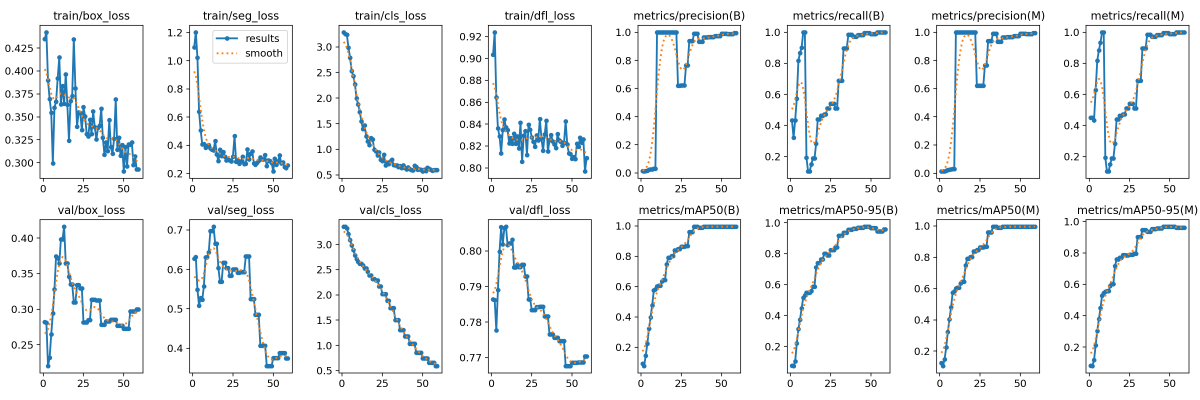

In [13]:
import cv2
from google.colab.patches import cv2_imshow

result_img = cv2.imread('/content/runs/segment/train/results.png')
fix_width = 1200
height,width = result_img.shape[:2]
ratio = fix_width / width
demension = (fix_width, int(height*ratio))
result_img = cv2.resize(result_img, demension, interpolation=cv2.INTER_AREA)
cv2_imshow(result_img)

**Custom 모델이 분류할 수 있는 부류 확인**

In [14]:
# 모델이 분류할 수 있는 부류의 수 확인
print(type(model.names), len(model.names))
# 모델이 분류할 수 있는 부류 확인
print(model.names)

<class 'dict'> 3
{0: 'Tomato', 1: 'Apple', 2: 'Oriental melon'}


# **6. Custom 모델로 Segmentation(분할)**

**Image Segmentation**

In [15]:
# 모델 예측
results = model.predict(source='/content/dataset2/YOLODataset/images/val/fruit14.jpg', save=True)


image 1/1 /content/dataset2/YOLODataset/images/val/fruit14.jpg: 480x640 7 Tomatos, 2 Apples, 154.6ms
Speed: 9.5ms preprocess, 154.6ms inference, 6.8ms postprocess per image at shape (1, 3, 480, 640)
Results saved to runs/segment/train2


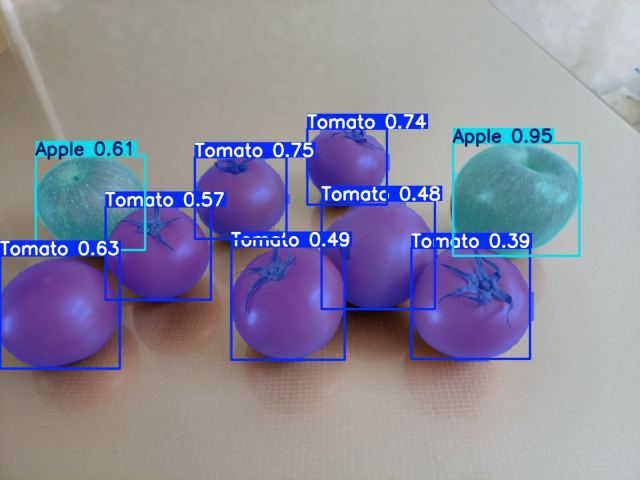

In [16]:
# 예측 이미지 확인
import cv2
from google.colab.patches import cv2_imshow

img = cv2.imread('/content/runs/segment/train2/fruit14.jpg')
fix_width = 640
height,width = img.shape[:2]
ratio = fix_width / width
demension = (fix_width, int(height*ratio))
img = cv2.resize(img, demension, interpolation=cv2.INTER_AREA)
cv2_imshow(img)

**Video Segmentation**

In [ ]:
# 동영상 예측
results = model.predict(source='/content/fruit.mp4', save=True)



WARNING ⚠️ inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

video 1/1 (frame 1/892) /content/fruit.mp4: 384x640 1 Tomato, 1 Oriental melon, 119.9ms
video 1/1 (frame 2/892) /content/fruit.mp4: 384x640 1 Tomato, 1 Oriental melon, 16.8ms
video 1/1 (frame 3/892) /content/fruit.mp4: 384x640 1 Tomato, 1 Oriental melon, 13.1ms
video 1/1 (frame 4/892) /content/fruit.mp4: 384x640 1 Tomato, 1 Oriental melon, 12.2ms
video 1/1 (frame 5/892) /content/fruit.mp4: 384x640 1 Tomato, 1 Oriental melon, 13.4ms
video 1/1 (frame 6/8

In [ ]:
# 코랩에서 영상을 보여줄 준비
import io
from IPython.display import HTML
from base64 import b64encode
def show_video(file_name, width=640):
  # show resulting deepsort video
  mp4 = open(file_name,'rb').read()
  data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
  return HTML("""
  <video width="{0}" controls>
        <source src="{1}" type="video/mp4">
  </video>
  """.format(width, data_url))

In [ ]:
# avi 파일을 mp4 파일로 변환 후 영상을 보여줌
import os
path_video = os.path.join("/content/runs/segment/train3","fruit.avi")
%cd /content/runs/segment/train3
import locale
locale.getpreferredencoding = lambda: "UTF-8"
!ffmpeg -y -loglevel panic -i "fruit.avi" "fruit.mp4"
%cd ../../../

# output object tracking video
path_output = os.path.join("/content/runs/segment/train3","fruit.mp4")
show_video(path_output, width=640)

Output hidden; open in https://colab.research.google.com to view.

# **7. 학습된 모델을 불러와 검출**

In [ ]:
# ultralytics 설치
!pip install ultralytics

# ultralytics 를 불러오고 체크
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.195 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.5/78.2 GB disk)


In [ ]:
# ultralytics에서 YOLO 모듈을 불러옴
from ultralytics import YOLO
# 학습된 모델의 아키텍처와 가중치을 함께 불러옴
model = YOLO('/content/runs/segment/train/weights/best.pt')

In [ ]:
# 모델이 분류할 수 있는 부류의 수 확인
print(type(model.names), len(model.names))
# 모델이 분류할 수 있는 부류 확인
print(model.names)

<class 'dict'> 3
{0: 'Apple', 1: 'Tomato', 2: 'Oriental melon'}


In [ ]:
# 모델 예측
results = model.predict(source='/content/dataset2/YOLODataset/images/val/04baa4ab034ac40bf2b30c8f76d204bc.png', save=True)


image 1/1 /content/dataset2/YOLODataset/images/val/04baa4ab034ac40bf2b30c8f76d204bc.png: 480x640 7 Apples, 8 Tomatos, 2 Oriental melons, 18.3ms
Speed: 3.8ms preprocess, 18.3ms inference, 8.1ms postprocess per image at shape (1, 3, 480, 640)
Results saved to runs/segment/predict


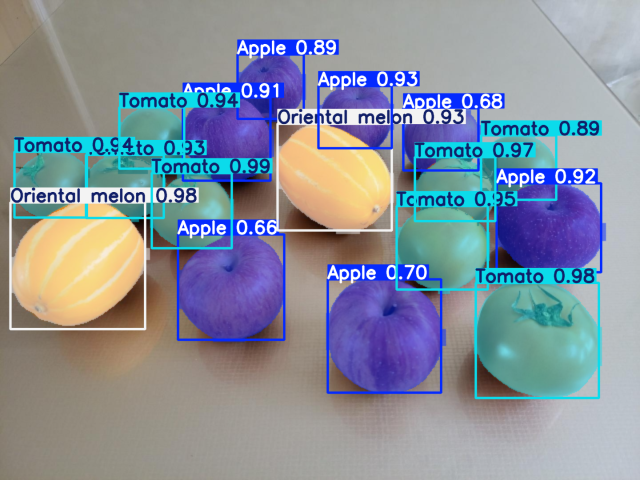

In [ ]:
# 예측 이미지 확인
import cv2
from google.colab.patches import cv2_imshow

img = cv2.imread('/content/runs/segment/predict/04baa4ab034ac40bf2b30c8f76d204bc.png')
fix_width = 640
height,width = img.shape[:2]
ratio = fix_width / width
demension = (fix_width, int(height*ratio))
img = cv2.resize(img, demension, interpolation=cv2.INTER_AREA)
cv2_imshow(img)